# Visualizing Linear Regression

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

%matplotlib notebook


## Defining the model

### Hypothesis function

In [2]:
# Function to predict the house price for given features and weight configuration

def predict(weights, X):
    return X.dot(weights)
    

### Cost and Gradient

In [3]:
# Functions to give the cost/penalty and gradient for a given weight configuration

#------------------------------------------------------#
#                       COST                           #
#------------------------------------------------------#
def cost(weights, X, y):
    m = len(y) # number of samples

    h = predict(weights, X)
    sq_error = (h - y) ** 2
    J = np.sum(sq_error) / (2*m)

    return J


#------------------------------------------------------#
#                      GRADIENT                        #
#------------------------------------------------------#
def gradient(weights, X, y):
    m = len(y)  # number of samples

    h = predict(weights, X)
    grad = X.transpose().dot(h - y) / m

    return grad


### Training function : Gradient descent

In [4]:
# Performs gradient descent to minimize cost

def gradientDescent(weights, X, y, learning_rate, iterations):
    m = len(y) # number of samples

    for i in range(iterations):
        weights -= learning_rate * gradient(weights, X, y)
    
    return weights
    

## Training and testing the model
Linear Regression using 2 features (2 variables)

### Loading data

In [5]:
data = pd.read_csv('data.txt', header=None)

X = data.iloc[:, :2].to_numpy()
y = data.iloc[:, 2:].to_numpy()

# normalize X
X = (X - np.mean(X)) / np.std(X)


### Visualizing data

<IPython.core.display.Javascript object>


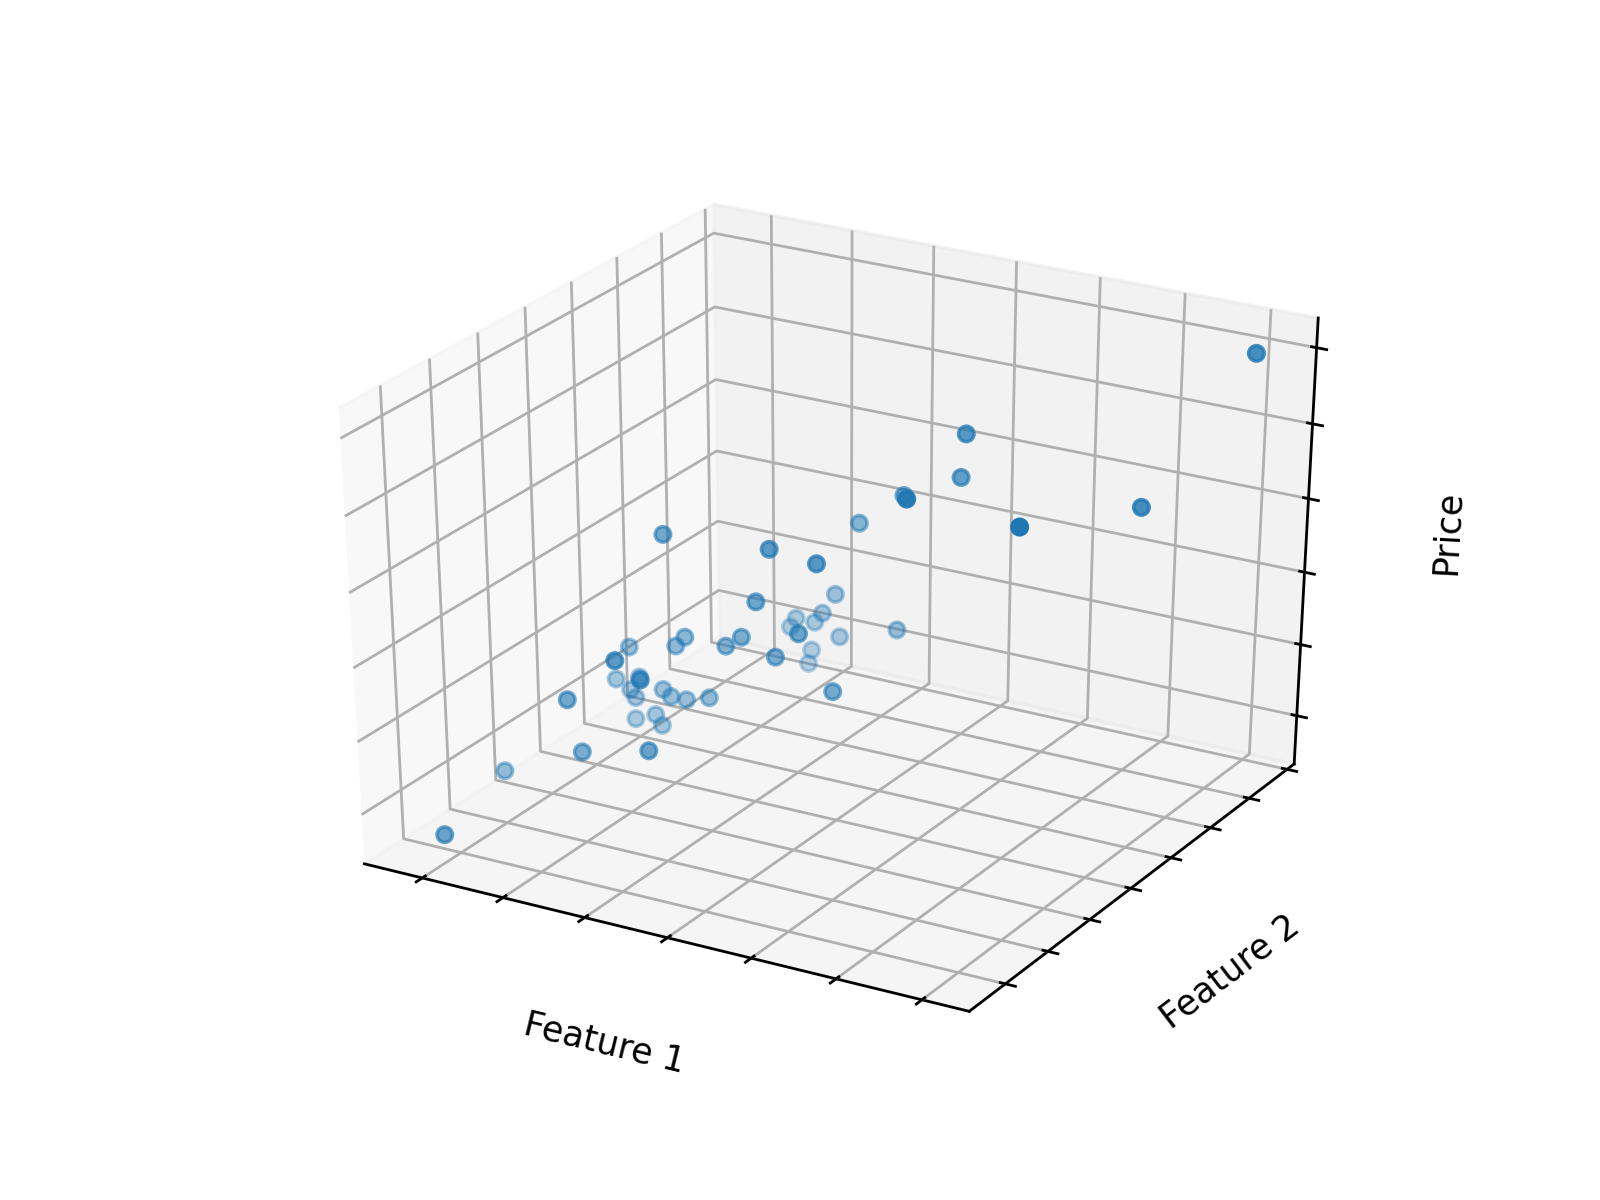

In [6]:
fig = plt.figure('Data Points - 3D')
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], y)

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.get_zaxis().set_ticklabels([])

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Price')
plt.show()

### Preparing data : Adding intercept and splitting

In [7]:
# adding the intercept term

#------------------------------------------------------#
#                 ADDING INTERCEPT TERM                #
#------------------------------------------------------#
intercept = np.ones((X.shape[0], X.shape[1]+1))
intercept[:, 1:] = X
X = intercept


#------------------------------------------------------#
#                    SPLITTING DATA                    #
#------------------------------------------------------#
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)


### Optimizing the cost and finding optimal weights

In [8]:
# set up inital weights
weights = np.zeros((train_X.shape[1], 1))

# initial cost 
print(f'Initial cost : {cost(weights, train_X, train_y)}')


# Optimize the cost using gradient descent
weights = gradientDescent(weights, train_X, train_y, learning_rate=0.01, iterations=1500)

# optimized cost
print(f'Optimized cost : {cost(weights, train_X, train_y)}')

Initial cost : 60802607742.88571
Optimized cost : 1901537206.2921014


### Visualizing predictions

<IPython.core.display.Javascript object>


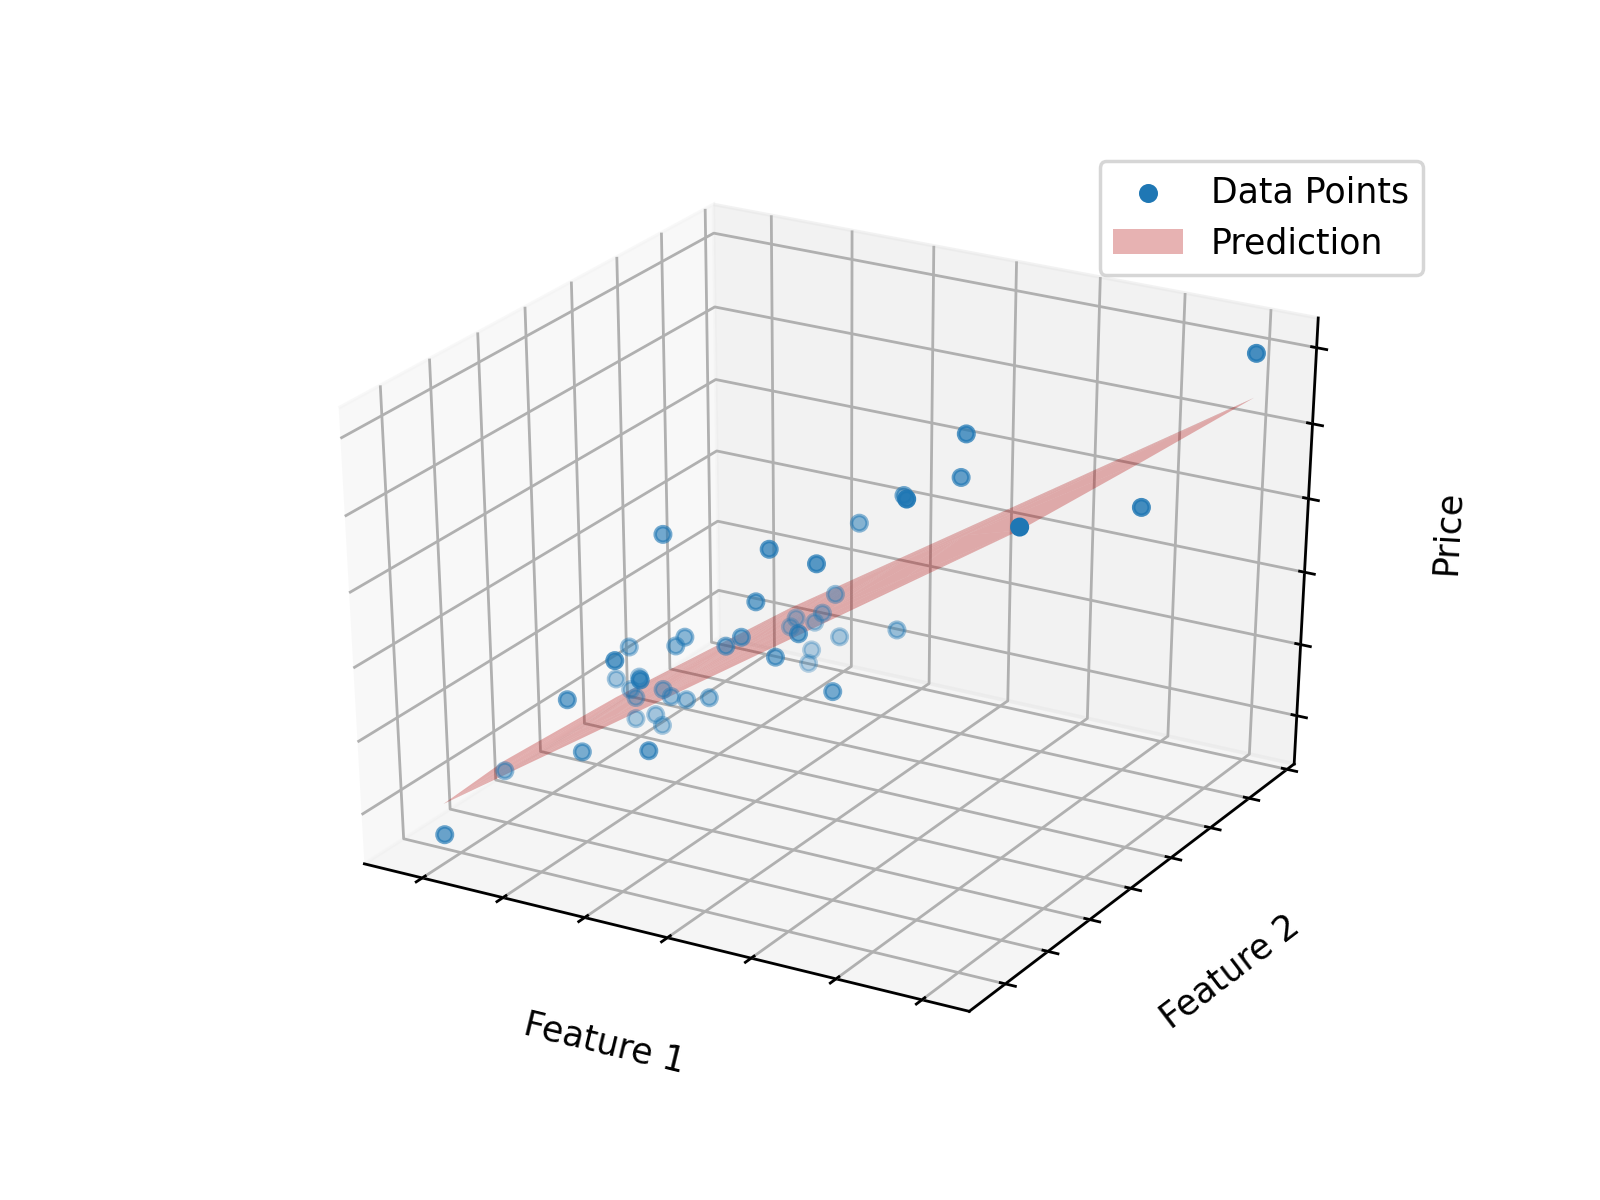

In [9]:
# testing the model
predictions = predict(weights, X)

_x = X[:, 1].squeeze()
_y = X[:, 2].squeeze()
pred = predictions.squeeze()

fig = plt.figure('Predictions 3D')
ax = fig.gca(projection='3d')

ax.scatter(X[:, 1], X[:, 2], y, label='Data Points')

surface = ax.plot_trisurf(_x, _y, pred, alpha=0.3, color='red', label='Prediction')
surface._facecolors2d = surface._facecolors3d
surface._edgecolors2d = surface._edgecolors3d

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.get_zaxis().set_ticklabels([])

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Price')

ax.legend()

plt.show()

### Plotting learning curves

<IPython.core.display.Javascript object>


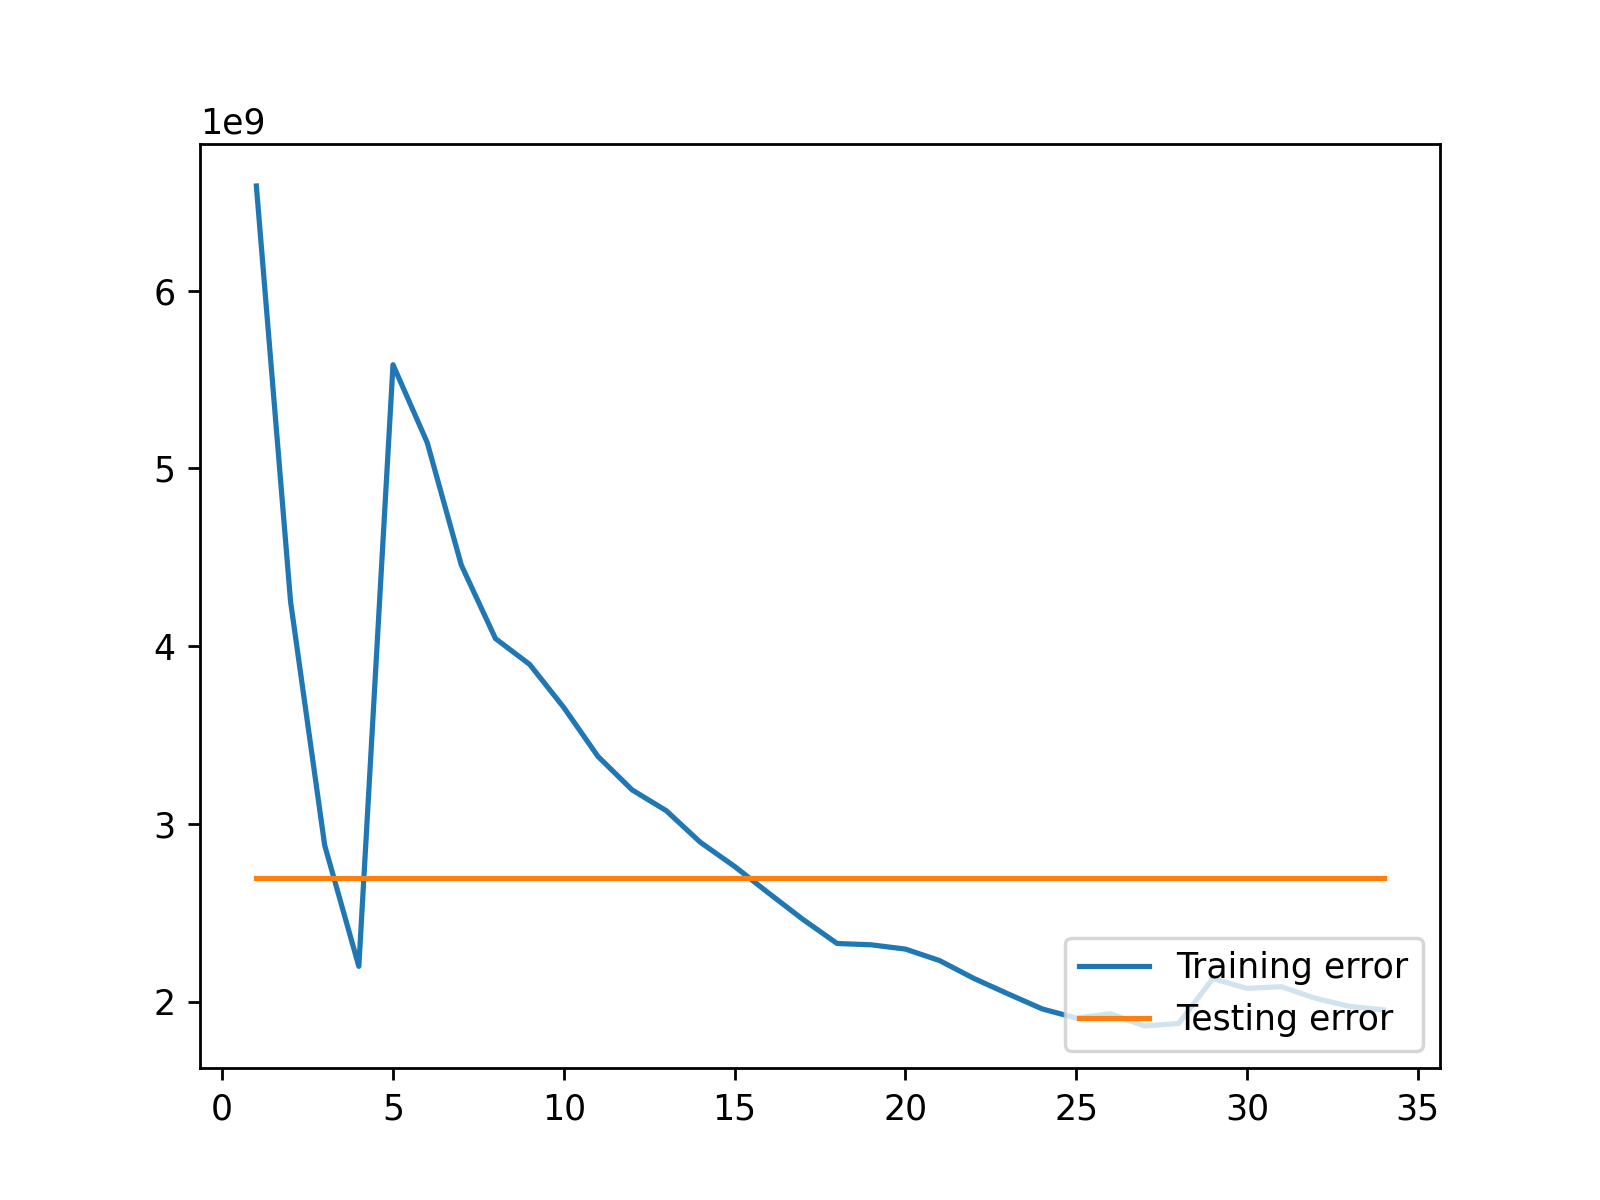

In [10]:
train_errors = []
test_errors = []

for i in range(1, len(train_X)):
    _x = train_X[:i, :]
    _y = train_y[:i]
    
    weights = np.zeros((train_X.shape[1], 1))
    weights = gradientDescent(weights, train_X, train_y, learning_rate=0.01, iterations=1500)
    
    train_errors.append(cost(weights, _x, _y))
    test_errors.append(cost(weights, test_X, test_y))
    
    
fig = plt.figure('Learning curves : 2D')

m = list(range(1, len(train_X)))
plt.plot(m, train_errors, label='Training error')
plt.plot(m, test_errors, label='Testing error')
plt.legend(loc='lower right')
plt.show()